# SVM

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys; sys.path.append('../')
from DataPreparing.data_preparing import *
from DataPreparing.HandleClassImbalance import *
from Evaluation.evaluate import *
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,SMOTENC,SMOTEN,BorderlineSMOTE
from imblearn.under_sampling import NearMiss,RandomUnderSampler
from sklearn.model_selection import train_test_split

# Read Data

In [4]:
#read csv file without header and index into dataframe
df1=  pd.read_csv('../DataFiles/gcn_new_embeddings2/group4/concatEmbeddings_36.csv', header=None, index_col=None)
df2=  pd.read_csv('../DataFiles/gcn_new_embeddings2/group4/concatEmbeddings_124.csv', header=None, index_col=None)
df3=  pd.read_csv('../DataFiles/gcn_new_embeddings2/group4/concatEmbeddings_127.csv', header=None, index_col=None)
df4=  pd.read_csv('../DataFiles/gcn_new_embeddings2/group4/concatEmbeddings_195.csv', header=None, index_col=None)
df5=  pd.read_csv('../DataFiles/gcn_new_embeddings2/group4/concatEmbeddings_457.csv', header=None, index_col=None)


In [5]:
df = pd.concat([df1, df2,df3,df4,df5], ignore_index=True)
df.to_csv('../DataFiles/gcn_new_embeddings2/group4/group4.csv', index=False, header=False)

In [6]:
df = df.drop(df.columns[0], axis=1)

In [7]:
df_numpy = df.to_numpy()
features = df_numpy[:, :-1]
labels = df_numpy[:, -1]
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=0)

In [9]:
print(set(y_train))

{'CWE124', 'CWE127', 'CWE457', 'CWE195', 'CWE36'}


{'CWE124': 2231, 'CWE127': 2219, 'CWE195': 1249, 'CWE36': 2679, 'CWE457': 730}


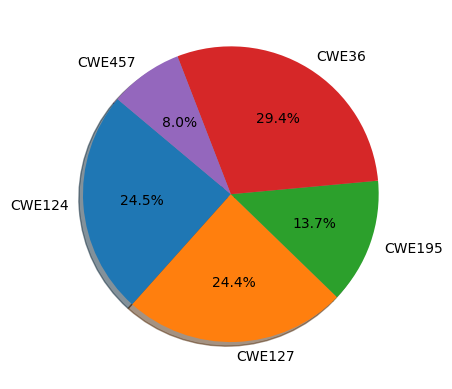

In [10]:
show_proportions(y_train)
unique, counts = np.unique(y_train, return_counts=True)
plt.pie(counts, labels=unique, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

# Initial Fit

## SVM


In [15]:
%%time
#93
clf = svm.SVC( kernel='linear', probability=True)
clf.fit(X_train, y_train)
evaluate(clf, X_val,y_val , clf.predict(X_train), y_train)

Training Accurracy: 93.26965305226175%
              precision    recall  f1-score   support

      CWE124       0.82      0.91      0.86       557
      CWE127       0.90      0.80      0.85       559
      CWE195       0.99      1.00      1.00       343
       CWE36       1.00      1.00      1.00       635
      CWE457       0.99      1.00      0.99       184

    accuracy                           0.93      2278
   macro avg       0.94      0.94      0.94      2278
weighted avg       0.93      0.93      0.93      2278

CPU times: total: 1min 49s
Wall time: 2min 6s


## LR

In [16]:
from scipy.stats import loguniform
import numpy as np
c_range =loguniform(1e-5, 1e5)
gamma_range = np.linspace(0.0001, 1)
#kernels= ['linear' ,'rbf']
param_grid = {'C': c_range,
              'gamma': gamma_range,
               #'kernel' : kernels
             }

In [17]:
clf2 = svm.SVC( kernel='linear')
parameter_search(X_train, y_train, clf2, param_grid)


In [ ]:
#save model
save_model(clf, "linear_svm_group4_prop")

## Test Safe Files

In [20]:
# loop on csv files in the folder
import os
import pandas as pd
import numpy as np

path = "../DataFiles/gcn_embeddings/group1/safe_concat/"
all_probabilities,x_safe_test,y_safe_test= get_class_probs(path,clf)

['concatEmbeddings_121.csv', 'concatEmbeddings_122.csv', 'concatEmbeddings_190.csv', 'concatEmbeddings_78.csv']


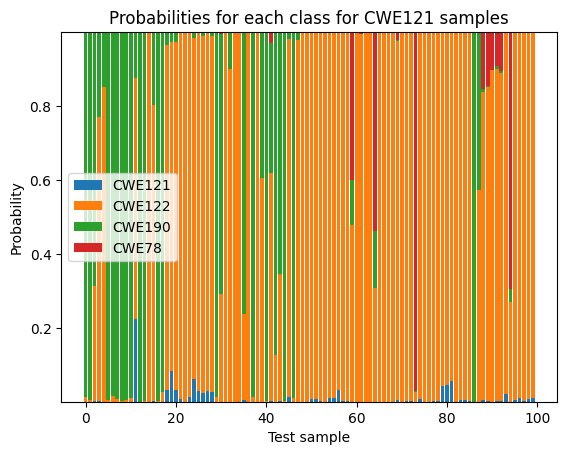

In [16]:
show_probs(all_probabilities[0], clf,"CWE121")


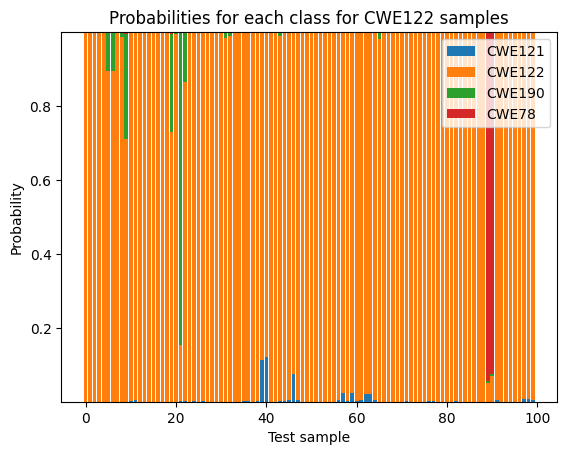

In [17]:
show_probs(all_probabilities[1], clf,"CWE122")

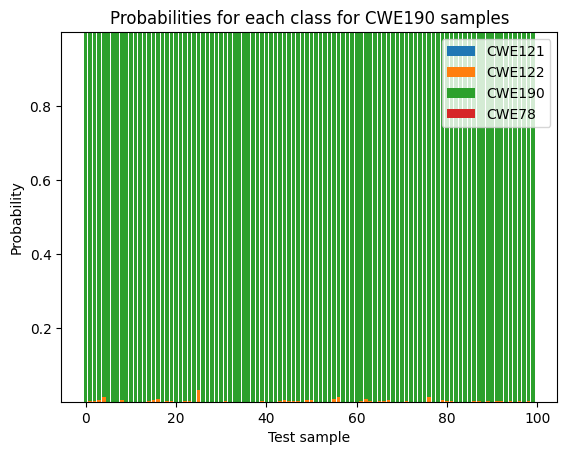

In [18]:
show_probs(all_probabilities[2], clf,"CWE190")

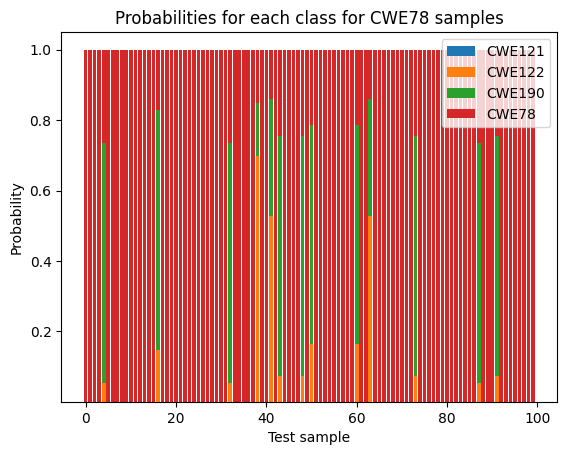

In [19]:
show_probs(all_probabilities[3], clf,"CWE78")